In [1]:
from matplotlib import pyplot as plt

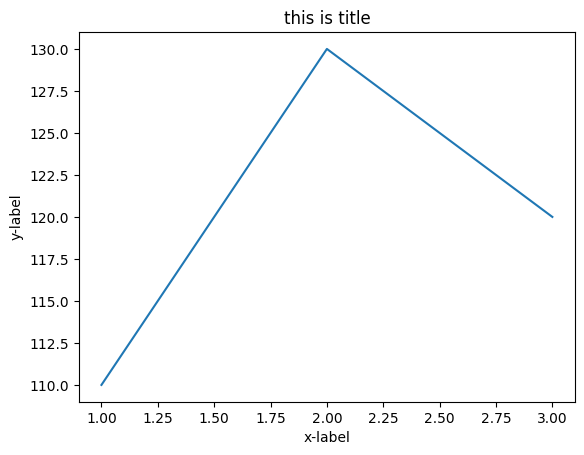

In [2]:
# line plot 그리기
x_values = [1,2,3]
y_values = [110,130,120]
# 축 이름 넣기
plt.xlabel("x-label")
plt.ylabel("y-label")
# title 넣기
plt.title("this is title")
plt.plot(x_values, y_values)
plt.show()

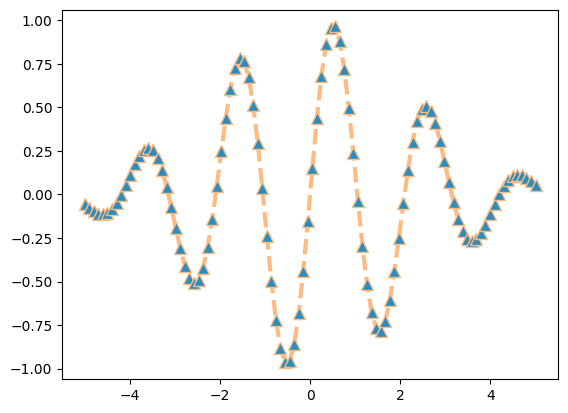

In [3]:
import numpy as np
x = np.linspace(-5,5, 100) #-5에서부터 5까지 100등분한 값들.
y = np.sin(3*x) * np.exp(-0.1*x**2) #numpy의 함수는 vector 단위 계산에 좋다.
plt.plot(x,y, '--^',
         lw=3,#line width 선 굵기
         color='#fdbb84',#선 색상. 16진수 RGB로 지정.
         mfc='#2b8cbe',#마커 색상. 16진수 RGB로 지정
         ms=8)#마커 size
#자세한 옵션은 matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

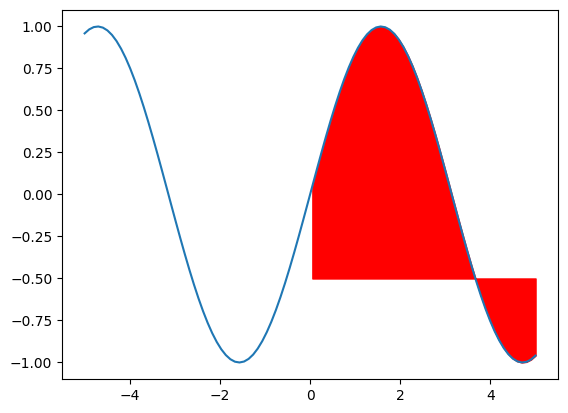

In [14]:
import numpy as np
fig, ax = plt.subplots()
x = np.linspace(-5,5, 100)
y = np.sin(x)
ax.plot(x,y)

#구간 색칠하는 방법.
#https://zephyrus1111.tistory.com/217
#https://proclusacademy.com/blog/area-under-density-curve-percentile/

#일단 line 의 좌표를 추출한다.
#위에서 구한 x,y 를 쓰면 되지만,
#내장된 함수로 figure 를 뽑은 경우, 아래의 방법을 통해, line 의 
#x 좌표와 y 좌표를 뽑아내면 된다.
line_data = ax.get_lines()
line_x_coordinate, line_y_coordinate = line_data[0].get_data()

mask = line_x_coordinate >=0
filled_x, filled_y = line_x_coordinate[mask], line_y_coordinate[mask]
#색칠할 부분의 line 의 좌표를 mask 를 통해 걸러낸다.

ax.fill_between(filled_x, y1=filled_y, y2=-0.5, color='red')
#첫 번째 변수는 칠할 부분의 x 좌표,
#y1과 y2 사이를 칠하게 된다.
#이것으로 두 곡선 사이를 색칠할 수도 있게 된다.




   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Text(0.5, 1.0, 'title is added')

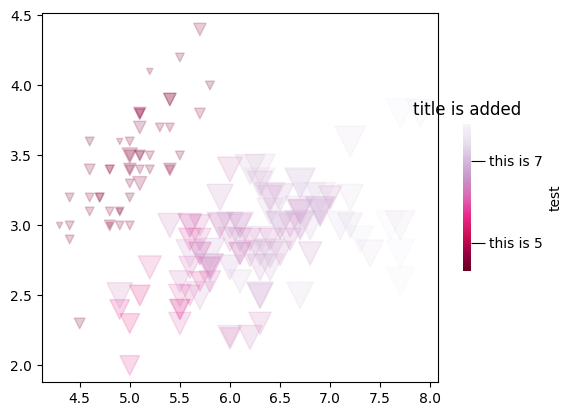

In [50]:
import numpy as np
import pandas as pd

import seaborn as sns

iris = sns.load_dataset('iris')
print(iris.head())
#예시로 사용하는 data

#https://rfriend.tistory.com/415 참고함.

fig, ax = plt.subplots()
ax.scatter(x=iris["sepal_length"],
           y=iris["sepal_width"],
           alpha=0.2,
           s=200*iris["petal_width"],#s로 각 점의 size 넣을 수 있다.

           marker='v', #점의 모양을 사각형으로 바꿀 수 있다.
           #all_shape=['.','o','v','^','>','<','s','p','*','h','H','D', 'd', '', '', '']

           c=iris["petal_length"], #c로 각 점의 색상을 넣을 수 있다.

           cmap='PuRd_r')#사용할 colormap 골라주기
#colormap 관련
#https://codetorial.net/matplotlib/set_colormap.html 참고함.
#matplotlib의 pyplot에는 colormap 을 간편하게 설정하기 위해
#몇 가지 colormap 을 미리 설정해 놓음.
#autumn(), bone(), cool(), copper(), flag(), gray(), 
#hot(), hsv(), inferno(), jet(), magma(), nipy_spectral(),
#pink(), plasma(), prism(), spring(), summer(), viridis(), winter(). 등등
#이것들 중 하나 마음에 드는 것을 골라서 사용하기.

def print_all_colormaps():
    """여기서 '_r'이 붙은 것은 색상 순서가 반대인 것."""
    cmaps = plt.colormaps()
    for cm in cmaps:
        print(cm)

#color 의 수치가 미리 설정된 colormap 에 따라서 색상에 대응된다.
#color 수치의 최대 최소가 colormap 의 양 끝에 대응되는 것은 자동인 듯.

#바로 옆에 colorbar 붙여주기.
import matplotlib as mpl
cmap=mpl.cm.PuRd_r
#일단 사용할 colormap 을 얻는다. 
# 색상이 연속적으로 배치되어 있는 객체라고 보면 될 듯
#https://zephyrus1111.tistory.com/286 여기 보면 내가 원하는 식으로 
#color 배치할 수도 있는 듯.
norm = mpl.colors.Normalize(vmin=min(iris["sepal_length"]),
                            vmax=max(iris["sepal_length"]))
#norm은 일종의 함수이다. norm(vmin) = 0, norm(vmax) = 1, 두 사이 값은 0과 1 사이의 normalize 된 값으로 보내는.

colormapping = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
#cmap 의 한 쪽 끝에는 vmin, 다른 끝에는 vmax가 대응된 객체가 나온다.

cbar = fig.colorbar(colormapping,
             ax=ax, #colorbar 를 그릴 axis 객체
             orientation="vertical",#또는 'horizontal'로 넣을 수 있다.
             shrink=0.4)#ax 대비 크기를 조절할 수 있다.
cbar.set_label("test")
cbar.set_ticks([5,7])
cbar.set_ticklabels(["this is 5", "this is 7"])

cbar.ax.spines["outline"].set_visible(False)
#colorbar 테두리 안보이게 하기.
cbar.ax.tick_params(size=10)
#tick 의 길이 조정. 0으로 하면 tick 안보임.
cbar.ax.set_title("title is added")

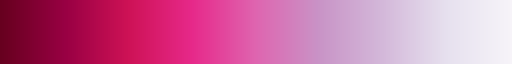

In [20]:
cmap

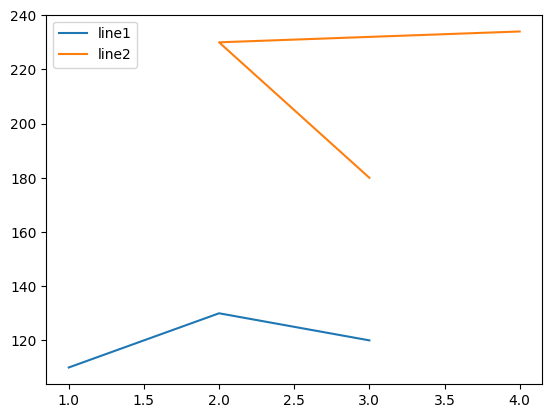

In [5]:
#여러 개의 라인을 넣기.
x_values1 = [1,2,3]
y_values1 = [110,130,120]
x_values2 = [4,2,3]
y_values2 = [234,230,180]
#plot 함수를 여러번 적용한다.
plt.plot(x_values1, y_values1)
plt.plot(x_values2, y_values2)
#legend는 함수 적용한 순서로 넣어지는 듯
plt.legend(["line1","line2"])
plt.show()

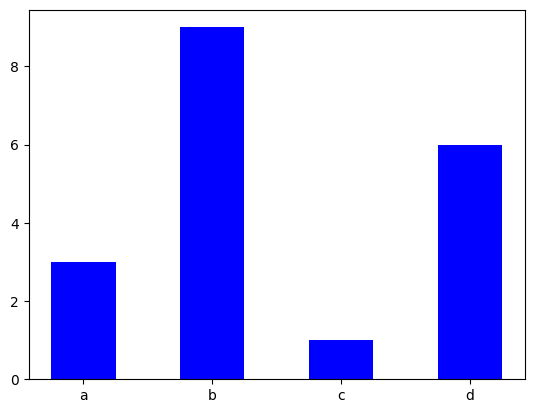

In [6]:
#bar chart 그리는 법
y=[3,9,1,6]
x=['a','b','c','d']
#bar의 넓이는 width 변수 색상은 color 변수
plt.bar(x,y, width=0.5, color="blue")
plt.show()

matplotlib은 크게 2가지 방법으로 사용할 수 있음.
stateless API (objected-based)
stateful API (state-based)

stateless API는 내가 지정한 figure, 내가 지정한 ax에 그림을 그리는 방법
stateful API는 현재의 figure, 현재의 ax에 그림으 그린느 방법.

여기서 figure는 그림을 그릴 공간
ax는 그 공간 중 지금 내가 사용할 부분

stateless 방법은 figure와 ax를 직접 만들어야 한다.
statefull 방법은 현재의 figure와 ax를 자동으로 찾아 그곳에 plotting해줌.
(statefull 방법을 사용하기 위해서 matplotlib이 아닌 matplotlib.pyplot이 필요)

Text(0.5, 1.0, "this is ax4 added by 'add_axes'")

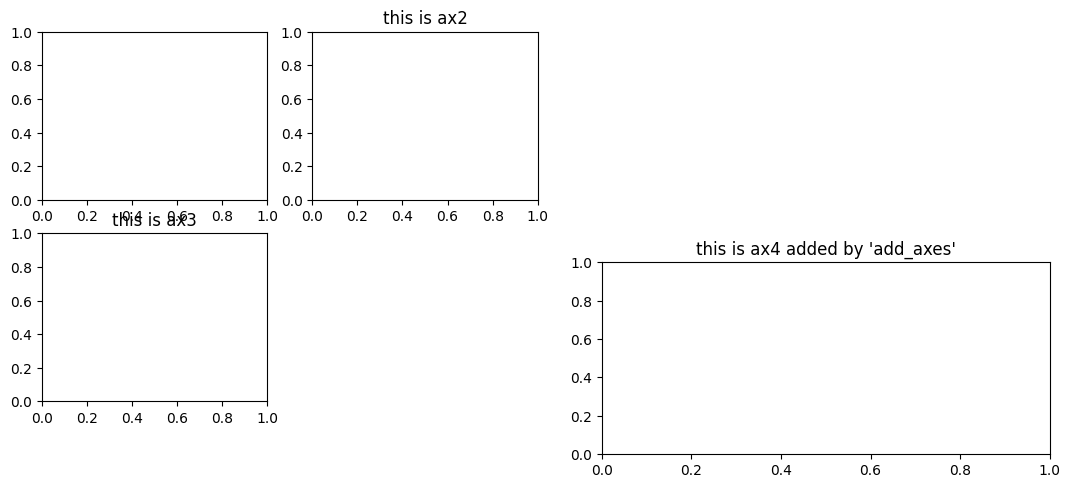

In [29]:
#stateless API에서 figure와 ax 객체 생성 방법
#1 ax가 없는 빈 figure 생성, 후에 ax를 추가해 줘야 함.
fig = plt.figure()

#axis 추가하는 방법은 2가지가 있음.
#add_axes를 쓸 경우 add_axes([왼쪽의 x좌표, 아래의 y좌표, 폭, 높이])
#로 위치 지정
#add_subplot은 grid 방식으로 위치지정. add_subplot(ijk)
#i행 j 열의 grid에서 k번째 값을 넣는다.

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax2.set_title("this is ax2")
ax3 = fig.add_subplot(223)
ax3.set_title("this is ax3")
ax4 = fig.add_axes((1,0,0.7,0.4))
ax4.set_title("this is ax4 added by 'add_axes'")


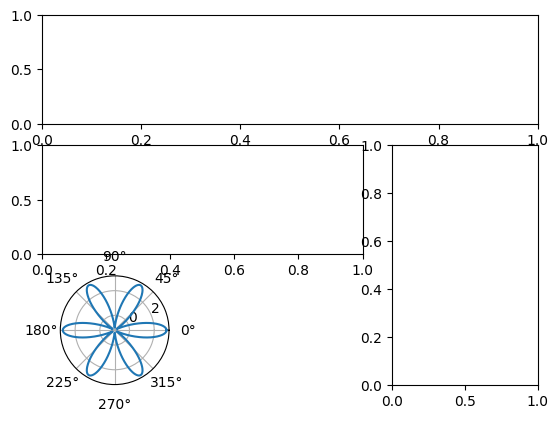

In [18]:
#ax를 추가할 때 여러 grid를 spanning 하는 것을 추가하는 방법
#일단 ax가 없는 figure 생성한 이후에, 
from matplotlib.gridspec import GridSpec

fig = plt.figure()
gs = GridSpec(3, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[1:, -1])
ax4 = fig.add_subplot(gs[-1, 0], polar=True) #axis를 만들 때 polar 설정을 해주면 이런 것도 만들 수 있다.


x = np.linspace(0, 2*np.pi, 1000)
ax4.plot(x, 1+2*np.cos(6*x))


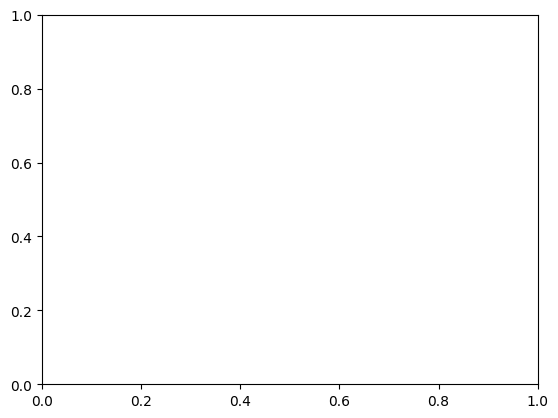

In [5]:
#2. 하나의 ax를 가지는 figure 생성.
#subplot과 subplots는 다른 명령어인 것을 주의!
fig, ax = plt.subplots()

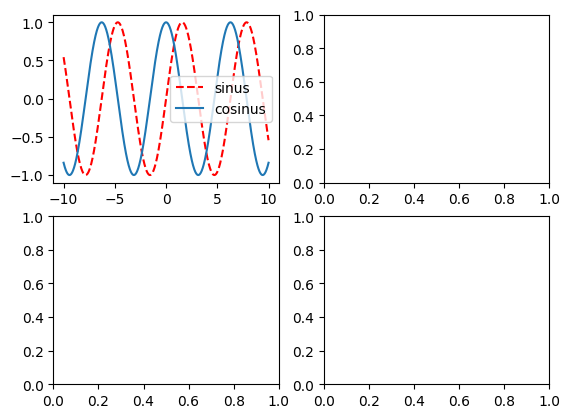

In [16]:
#3 여러 개의 ax를 가지는 하나의 figure 생성
fig, axes = plt.subplots(2,2)

import numpy as np
x = np.linspace(-10, 10, 1000)
axes[0,0].plot(x, np.sin(x),'--r', label='sinus')
#'--r'은 ls(line style)과 color를 합쳐놓은 것이다.
#axes[0,0].plot(x, np.sin(x),color='r',ls="--", label='sinus')
axes[0,0].plot(x,np.cos(x), label='cosinus')
axes[0,0].legend()



axes has type such as ,
[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


Text(8, 90, 'arrow')

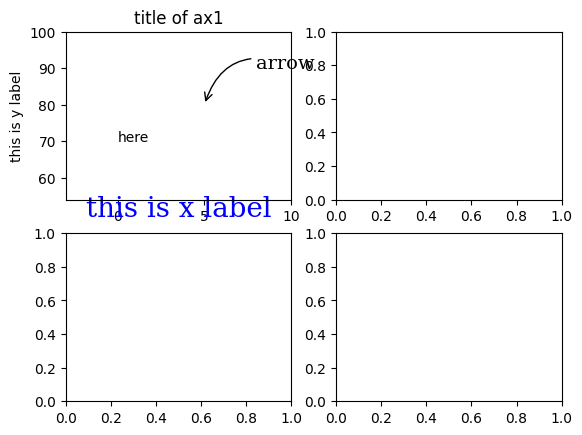

In [14]:
#ax 각각에 대해 적용할 수 있는 method 정리
fig, axes = plt.subplots(2,2)
print("axes has type such as ,")
print(axes)
ax1 = axes[0,0]
#title 붙이기.
ax1.set_title("title of ax1")
#xlabel과 ylabel 붙이기
ax1.set_xlabel("this is x label", 
               labelpad=-20,#이것은 x label을 y 축 방향으로 이동시킨다.
               fontsize=20, 
               fontname='serif', 
               color="blue")
ax1.set_ylabel("this is y label")

#x축과 y 축의 범위도 따로 지정할 수 있음.
ax1.set_xlim(-3,10)
ax1.set_ylim(54,100)

#따로 글자를 넣을 수 있음. xy는 그 글자가 들어가는 좌표.
ax1.annotate("here", xy=(0,70))
#화살표를 사용해서 특정 지점을 가리키게 할 수도 있음.
ax1.annotate("arrow", fontsize=14, 
             family="serif", 
             xy=(5, 80), #화살표가 가리키는 좌표
			xytext=(8, 90),#화살표의 설명문의 좌표
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

# seaborn 사용하는 방법
seaborn을 사용하는 요령
seaborn의 함수에는 두가지 카테고리가 있다.
axis level 함수와 figure level 함수.

In [19]:
import seaborn as sns
import pandas as pd

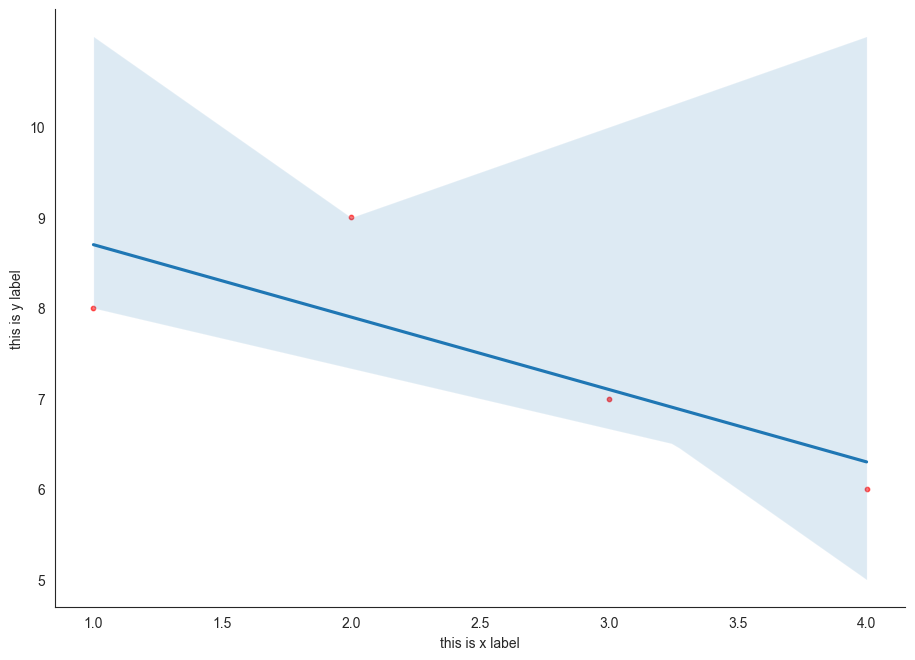

In [8]:
#figure level 함수의 경우는 미리 만들어놓은 fig, ax를 활용하지 못한다고 함.
#대신 그 함수가 객체를 return하고, 
#return된 객체에서 ax, fig 등을 불러와서 조작이 가능하다고 함.
data = {'a':[1,2,3,4], 'b':[8,9,7,6]}
df_data = pd.DataFrame(data)

sns.set_style("white")
#5가지 테마가 있다고 함. darkgrid, whitegrid, dark, white, ticks
obj = sns.lmplot(x="a",y="b", data=df_data, 
           scatter_kws={"alpha":0.6, 's':10, 'color':'red'})
#lmplot은 figure level 함수라고 함.

#alpha는 점의 불투명도
#s는 점의 크기
#color는 점 색상
#https://matplotlib.org/2.0.2/api/pyplot_api.html#matplotlib.pyplot.scatter 참고.

#obj 객체의 fig나 ax를 활용
obj.fig.set_figwidth(10)
obj.fig.set_figheight(7)
#fig의 높이 너비 조절

obj.ax.set_ylabel("this is y label")
obj.ax.set_xlabel("this is x label")
obj.ax.set_yticks([5,6,7,8,9,10])
#ax 조절.

   a  b
0  x  8
1  x  9
2  y  7
3  y  6


Text(0, 0.5, "in data, points are in values of 'b' column")

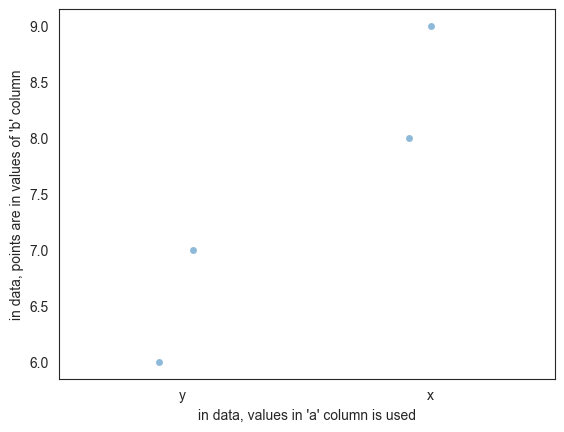

In [14]:
#seaborn의 axis level 함수의 경우는 미리 만들어놓은 axis obj을
#sns 함수의 ax argument에 넣어주면 된다.
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()

data = {'a':['x','x','y','y'], 'b':[8,9,7,6]}
df_data = pd.DataFrame(data)
print(df_data)
#strip plot 같은 경우 이러한 data 형태가 필요.

#axis level 함수 중 하나인 strip plot
sns.stripplot(data=df_data, x="a", y="b", 
              order=['y','x'], alpha=0.5, ax=ax)
ax.set_xlabel("in data, values in 'a' column is used")
ax.set_ylabel("in data, points are in values of 'b' column")
